In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from drive.MyDrive.DL.codes.transcription.utils import plot_training
import tensorflow as tf
from drive.MyDrive.DL.codes.hatespeech.pipelines import ML,binarize
import warnings
warnings.filterwarnings('ignore')
obj = 'img'
early_stopping = EarlyStopping(monitor='loss', patience=5)

Found 71496 files belonging to 6 classes.
Found 5000 files belonging to 6 classes.
Found 10000 files belonging to 6 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 2199s 945ms/step - accuracy: 0.3697 - loss: 0.9846 - val_accuracy: 0.4490 - val_loss: 0.6980
Epoch 2/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 365s 163ms/step - accuracy: 0.3693 - loss: 0.6607 - val_accuracy: 0.4490 - val_loss: 0.6920
Epoch 3/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 356s 159ms/step - accuracy: 0.3697 - loss: 0.6595 - val_accuracy: 0.4490 - val_loss: 0.7022
Epoch 4/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 356s 159ms/step - accuracy: 0.3698 - loss: 0.6589 - val_accuracy: 0.4490 - val_loss: 0.7021
Epoch 5/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 356s 159ms/step - accuracy: 0.3695 - loss: 0.6587 - val_accuracy: 0.4490 - val_loss: 0.7022
Epoch 6/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 356s 159ms/step - accuracy: 0.3699 - loss: 0.6589 - val_accuracy: 0.4490 - val_loss: 0.7021
Epoch 7/150
2

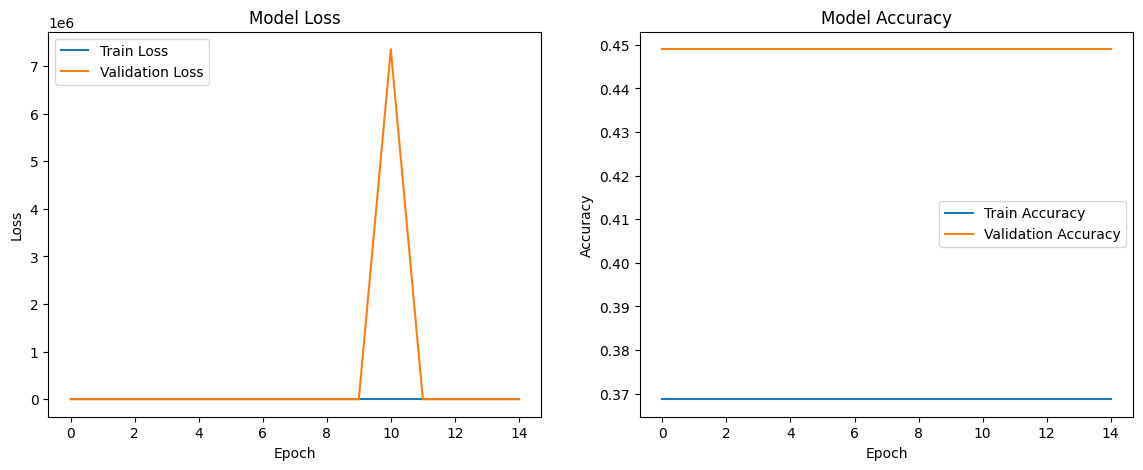

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(f'/content/drive/MyDrive/DL/PREG1/hate-speech/{obj}/train',labels='inferred',label_mode='int',color_mode='rgb',batch_size=32,image_size=(299,299))
valid = tf.keras.utils.image_dataset_from_directory(f'/content/drive/MyDrive/DL/PREG1/hate-speech/{obj}/val',labels='inferred',label_mode='int',color_mode='rgb',batch_size=32,image_size=(299,299))
test  = tf.keras.utils.image_dataset_from_directory(f'/content/drive/MyDrive/DL/PREG1/hate-speech/{obj}/test',labels='inferred',label_mode='int',color_mode='rgb',batch_size=32,image_size=(299,299))

train = train.map(binarize)
valid = valid.map(binarize)
test = test.map(binarize)

inception_model = InceptionV3(include_top=False,input_shape=(299,299,3))
x = Flatten()(inception_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='softmax')(x)

model = Model(inputs=inception_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    train,
    validation_data=valid,
    epochs=150,
    callbacks=[early_stopping]
)

model.evaluate(test)
plot_training(history)